# Mohak Gangwani

## **Task 1 - Prediction using Supervised ML)**

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Exploratory Data Analysis

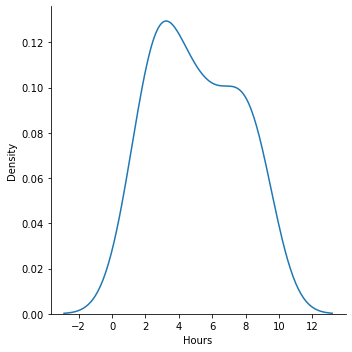

In [5]:
# Plotting the distribution of Hours
sns.displot(df["Hours"],kind = "kde")
plt.show()

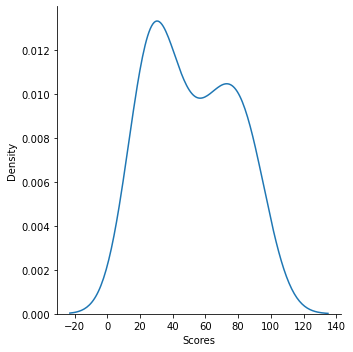

In [6]:
# Plotting the distribution of Scores
sns.displot(df["Scores"],kind = "kde")
plt.show()

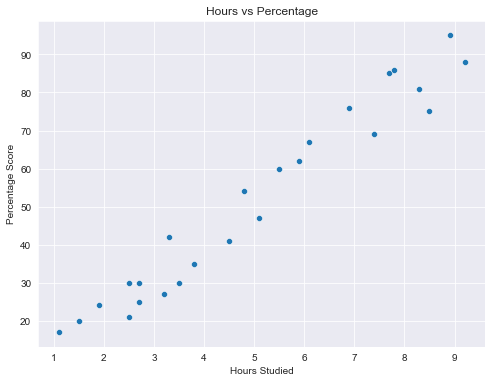

In [7]:
# Plotting the Hours v/s Scores relation
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.scatterplot(data = df,x='Hours', y='Scores')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

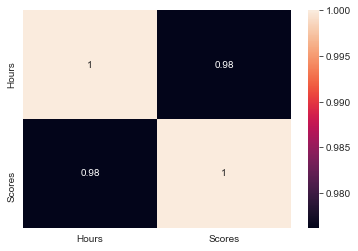

In [8]:
sns.heatmap(df.corr(), annot = True)
plt.show()

**From the scatterplot and the heatmap, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## Training the data

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

LinearRegression()

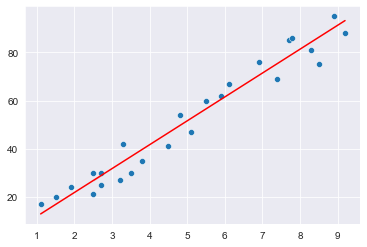

In [12]:
#Plotting the regression line
line = lr.coef_*X+lr.intercept_

#Plotting for the test data
sns.set_style('darkgrid')
sns.scatterplot(x = X.flatten(), y = y.flatten())
sns.lineplot(x = X.flatten(), y = line.flatten(),color = 'r')
plt.show()

## Making Predictions

In [13]:
#Testing data
print(X_test)
#Predicting the scores
y_predicted = lr.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
# Comparing Actual vs Predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})  
comparison

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
# You can also test with your own data
hours = [[5.5],[1],[0],[9.25]]
own_pred = lr.predict(hours)
print(f"No of Hours = {hours}")
print(f"Predicted Scores = {own_pred[:]}")

No of Hours = [[5.5], [1], [0], [9.25]]
Predicted Scores = [56.52677068 11.92881652  2.01816004 93.69173249]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [16]:
from sklearn import metrics  
print('Accuracy: ',metrics.r2_score(y_test,y_predicted))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_predicted))

Accuracy:  0.9454906892105356
Mean Absolute Error:  4.183859899002975
